<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/kMeans_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Step 2: Download and load the dataset
path = kagglehub.dataset_download("anotherbadcode/boxofficecollections")
print("Path to dataset files:", path)

# Load the CSV file (adjust the filename if needed)
df = pd.read_csv(f"{path}/BoxOfficeCollections.csv")  # Replace with the actual filename if different
print(df.head())

100%|██████████| 161k/161k [00:00<00:00, 18.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/anotherbadcode/boxofficecollections/versions/1
                  Movie  Year  Score  Adjusted Score             Director  \
0               Hot Rod  2007     39          42.918       Akiva Schaffer   
1            Game Night  2018     85          99.838   John Francis Daley   
2  The First Wives Club  1996     49          53.174          Hugh Wilson   
3           Scary Movie  2000     52          54.973  Keenen Ivory Wayans   
4              Blockers  2018     84          96.883           Kay Cannon   

                                                Cast  \
0  Andy Samberg, Jorma Taccone, Bill Hader, Danny...   
1  Jason Bateman, Rachel McAdams, Kyle Chandler, ...   
2  Goldie Hawn, Bette Midler, Diane Keaton, Maggi...   
3  Shawn Wayans, Marlon Wayans, Cheri Oteri, Shan...   
4  Leslie Mann, Ike Barinholtz, John Cena, Kathry...   

                                           Consensus  Box Office Collection  \

In [4]:
# Step 3: Select features and preprocess
features = ['Score', 'Box Office Collection', 'IMDB Rating']
df = df[features].dropna()  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [5]:
# Step 4: Apply k-Means clustering
k = 3  # You can try different values
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
df['Cluster'] = clusters

In [6]:
# Step 5: Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

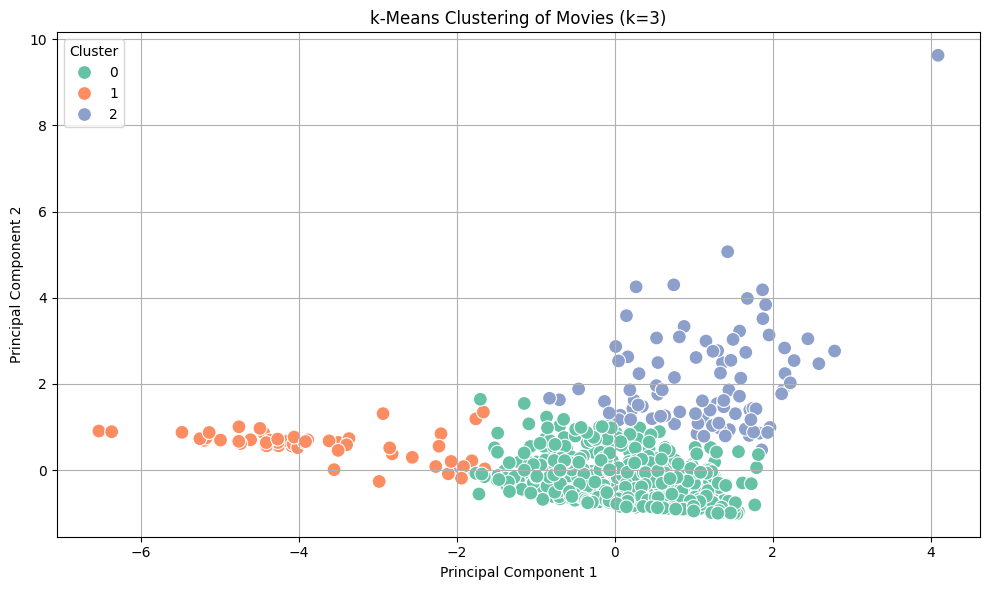

In [7]:
# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title(f'k-Means Clustering of Movies (k={k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()